In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


##Load dữ liệu từ file CSV

In [4]:
df = pd.read_csv("/content/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
cdf = df 
cdf['Salary'] = df['Salary']/1000

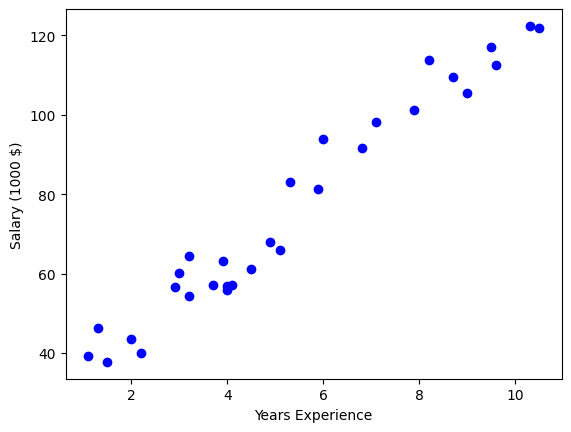

In [6]:
plt.scatter(cdf.YearsExperience, cdf.Salary, color ="blue")
plt.xlabel("Years Experience")
plt.ylabel("Salary (1000 $)")
plt.show()

## Chia tập dữ liệu thành 2 phần train và test theo tỉ lệ 8:2

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Tạo mô hình Linear Regression với sklearn và huấn luyện trên dữ liệu train

In [8]:
from sklearn import linear_model 

regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['YearsExperience']])
y_train = np.asanyarray(train[['Salary']])
regr.fit(x_train, y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.44216604]]
Intercept:  [26.0592956]


## Sử dụng mô hình đã huấn luyện để dự đoán trên tập test

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
x_test = np.asanyarray(test[["YearsExperience"]])
y_test = np.asanyarray(test[["Salary"]])
y_test_ = regr.predict(x_test)




## Đánh giá hiệu quả của mô hình trên cả 2 tập train và test


In [12]:
print("R2 score on train set: %.2f" % r2_score(y_train, regr.predict(x_train)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_test_))
print("MSE: %.2f" % mean_squared_error(y_test, y_test_))


R2 score on train set: 0.94
MAE: 2.30
MSE: 6.56


Text(0, 0.5, 'Salary (1000$)')

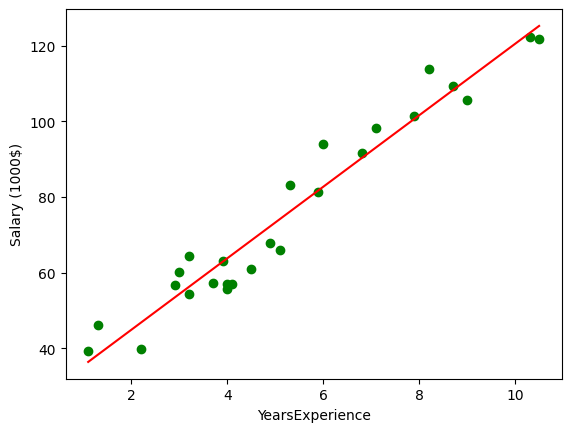

In [13]:
plt.scatter(train.YearsExperience, train.Salary, color = "green")
plt.plot(x_train, regr.coef_[0]*x_train + regr.intercept_[0], '-r')
plt.xlabel("YearsExperience")
plt.ylabel("Salary (1000$)")